### Exploring data

In [13]:
# importing libraries
import pandas as pd 
import numpy as np
import math
import warnings
import datetime
from sklearn import datasets
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
pd.set_option('display.max_columns', None)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, LabelEncoder
from imblearn.over_sampling import SMOTE as smote
from imblearn.under_sampling import TomekLinks as tomek
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
data = pd.read_csv('C:/Users/ivanr/OneDrive/Radna površina/HR Analytics/aug_train.csv')

In [11]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [14]:
data.shape

(19158, 14)

In [17]:
print("Missing values in the dataset:\n\n", data.isna().sum())


Missing values in the dataset:

 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [18]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [19]:
for col in data.select_dtypes(np.object).columns:
    print("column name: ", col)
    print(data[col].value_counts())
    print('\n')        

column name:  city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


column name:  gender
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


column name:  relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


column name:  enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


column name:  education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


column name:  major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major        

In [20]:
data_duplicates=data.duplicated()
data_duplicates.sum()

0

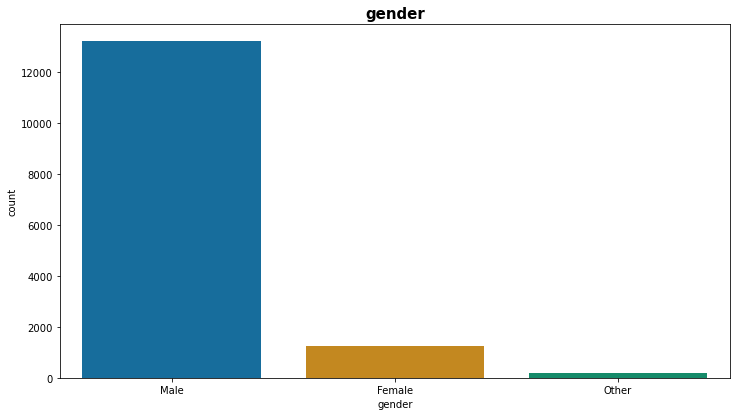

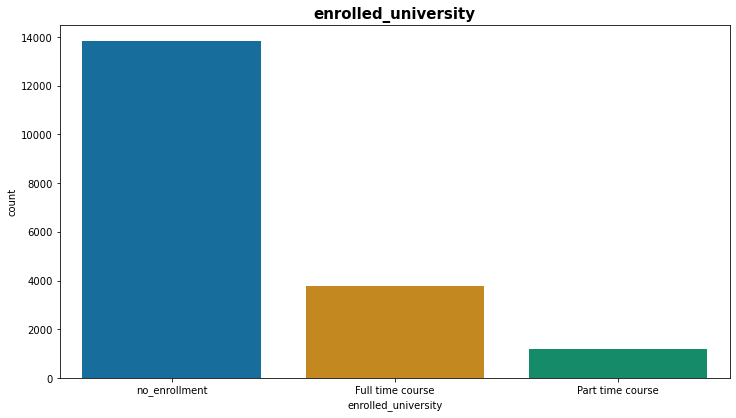

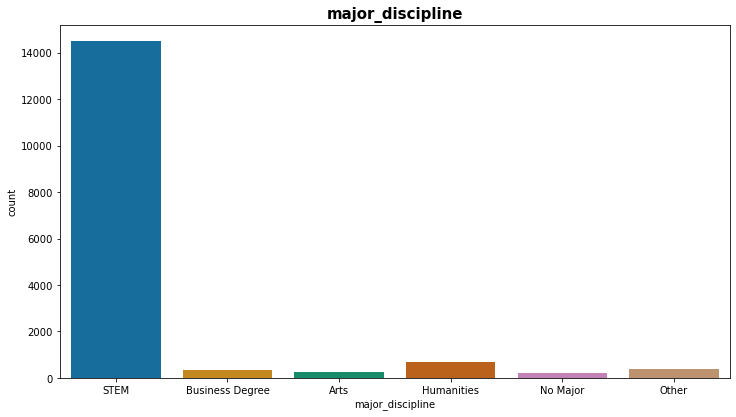

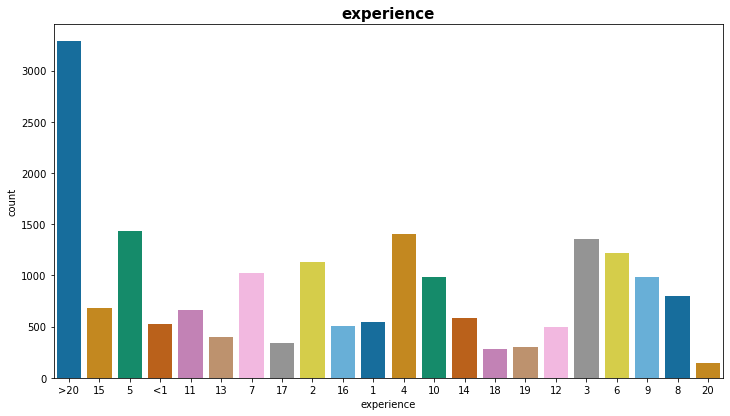

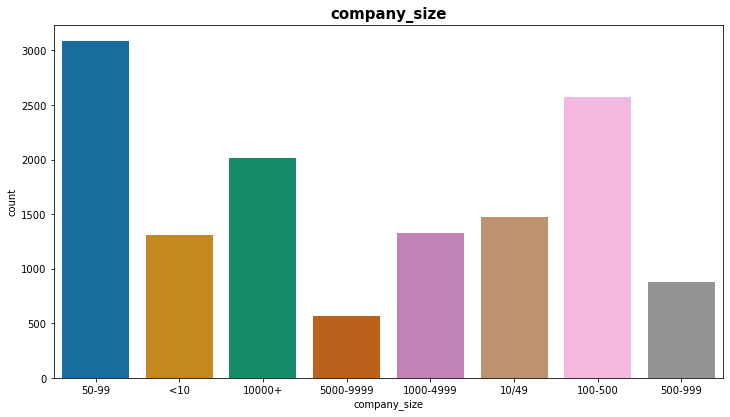

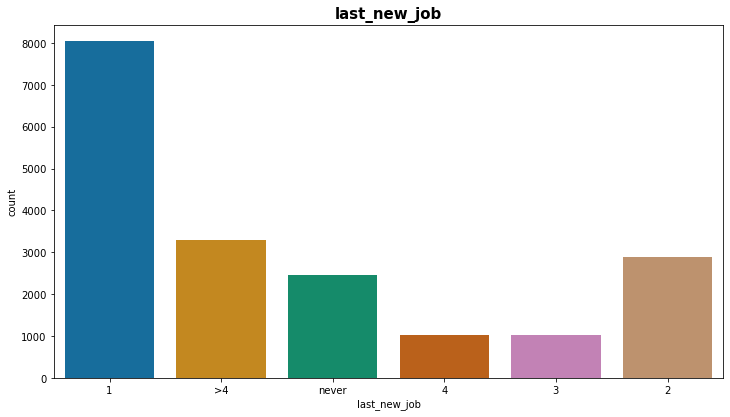

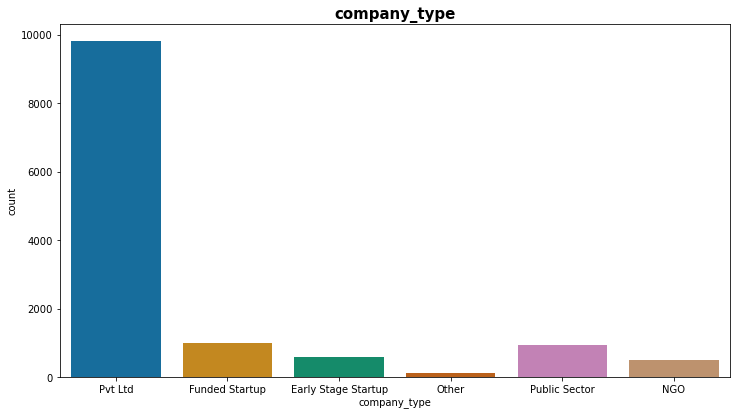

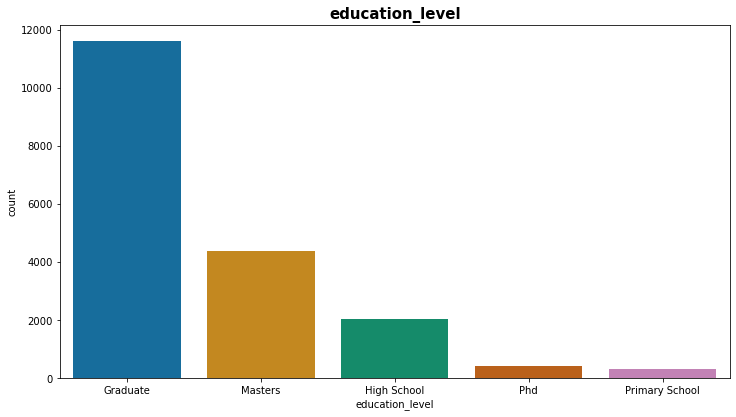

In [25]:
cols_with_nan_data = data[['gender', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'last_new_job', 'company_type', 'education_level']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_nan_data:
    plt.figure(figsize=(12,6.5)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    sns.countplot(data = data[i], x = cols_with_nan_data[i], palette=colorblind_palette)
    plt.show()

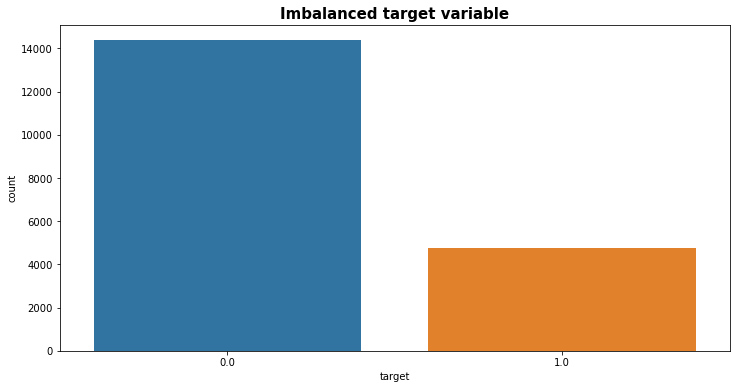

In [27]:
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x='target', data=data)

#### From the exploring our data we relise we need to apply following steps:



There are NaN values in features that we need to clean properly (new category, replace with most freq values, mean, median etc..)

Our target is imbalanced, so we need to balance data so we can apply ML models properly.